# Diferença entre Correlação e Causalidade na Indústria: Um Guia para Cientistas de Dados

## Introdução

No campo da ciência de dados, especialmente em aplicações industriais, é crucial compreender a diferença entre **correlação** e **causalidade**. Muitos modelos de Machine Learning podem prever padrões com precisão, mas falham ao identificar a causa real por trás desses padrões. Em ambientes de produção, onde decisões equivocadas podem resultar em perdas significativas, entender as relações de causa e efeito se torna fundamental.

Este artigo explora a distinção entre correlação e causalidade, ilustrando com um exemplo prático de uma linha de produção. Veremos como a lubrificação de componentes, número de falhas e produção diária estão inter-relacionados, e como a inferência causal pode melhorar a eficiência industrial.

## Conceitos Fundamentais

### Correlação:
Refere-se a uma relação estatística entre duas variáveis, onde mudanças em uma estão associadas a mudanças na outra. No entanto, isso não implica que uma cause a outra.

### Causalidade:
Indica uma relação de causa e efeito entre duas variáveis, onde uma variável (a causa) produz um efeito na outra (o efeito).

Matematicamente, a correlação é frequentemente medida pelo coeficiente de correlação de Pearson:

$$
r = \frac{\sum_{i=1}^{n}(X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^{n}(X_i - \bar{X})^2 \sum_{i=1}^{n}(Y_i - \bar{Y})^2}}
$$

Onde $r$ varia entre -1 e 1, indicando a força e a direção da relação linear entre duas variáveis.


## Aplicação Prática na Indústria

Em uma linha de produção, utilizávamos um modelo preditivo para antecipar falhas em máquinas com base em dados de sensores. Observamos que picos de temperatura estavam altamente correlacionados com falhas mecânicas. Isso nos levou a implementar ações preventivas focadas no controle de temperatura.

No entanto, ao aplicar uma abordagem de **Inferência Causal**, percebemos que a temperatura elevada era apenas um sintoma, não a causa raiz das falhas. A verdadeira causa era a **falta de lubrificação** nos componentes mecânicos. Ao direcionar nossos esforços para melhorar a lubrificação, conseguimos reduzir significativamente as falhas, aumentando a eficiência operacional e reduzindo custos.

## A Importância da Inferência Causal

A diferença crucial entre prever um resultado $( Y \sim X )$ e entender o que acontece quando intervimos diretamente em uma variável $P(Y)$ | do $(X)$ está na capacidade de tomar ações mais assertivas. Enquanto modelos preditivos baseados em Machine Learning identificam padrões e fazem previsões, eles não necessariamente revelam por que esses padrões ocorrem.

A Inferência Causal nos permite:

- Identificar relações de causa e efeito.
- Desenvolver estratégias de intervenção mais eficazes.
- Evitar ações baseadas em correlações espúrias que podem não trazer resultados reais.

## Análise de Regressão

Para entender as relações entre lubrificação, falhas e produção, realizamos duas regressões lineares:

1. **Nível de Lubrificação (%) vs. Número de Falhas**
2. **Número de Falhas vs. Produção Diária (unidades)**

## Exemplo de Tabela com Dados Simulados

Aqui está um exemplo de tabela com dados simulados, onde podemos analisar tanto a correlação quanto inferir causalidade:

| Dia  | Temperatura Média (°C) | Número de Falhas | Nível de Lubrificação (%) | Produção Diária (unidades) | Intervenção (Lubrificação Melhorada) |
|------|-------------------------|------------------|---------------------------|----------------------------|--------------------------------------|
| 1    | 80                      | 5                | 50                        | 900                        | Não                                  |
| 2    | 85                      | 7                | 40                        | 850                        | Não                                  |
| 3    | 90                      | 9                | 35                        | 800                        | Não                                  |
| 4    | 88                      | 8                | 38                        | 820                        | Não                                  |
| 5    | 92                      | 10               | 30                        | 780                        | Não                                  |
| 6    | 80                      | 4                | 55                        | 920                        | Sim                                  |
| 7    | 82                      | 3                | 65                        | 940                        | Sim                                  |
| 8    | 85                      | 2                | 70                        | 950                        | Sim                                  |
| 9    | 84                      | 3                | 72                        | 940                        | Sim                                  |
| 10   | 83                      | 3                | 75                        | 930                        | Sim                                  |

### Descrição dos Dados:

- **Temperatura Média (°C)**: Monitoramento da temperatura média ao longo do dia.
- **Número de Falhas**: Número de falhas mecânicas ocorridas ao longo do dia.
- **Nível de Lubrificação (%)**: Percentual de lubrificação dos componentes mecânicos, refletindo a qualidade da manutenção.
- **Produção Diária (unidades)**: Quantidade de unidades produzidas ao longo do dia.
- **Intervenção (Lubrificação Melhorada)**: Indica se houve uma intervenção direta na lubrificação dos componentes.

### Objetivo:

- **Correlação**: Podemos observar a relação entre **Temperatura** e **Número de Falhas**, buscando identificar se o aumento de temperatura está diretamente associado a um aumento no número de falhas.
  
- **Causalidade**: Aplicando a inferência causal, queremos investigar se a melhora na lubrificação reduziu diretamente o número de falhas e aumentou a produção diária.

Com base nessa tabela, podemos calcular coeficientes de correlação e também realizar uma análise causal para determinar como a intervenção de lubrificação impactou diretamente as falhas e a produção.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

In [5]:
# Criação do DataFrame com os dados fornecidos
data = {
    'Dia': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Temperatura Média (°C)': [80, 85, 90, 88, 92, 80, 82, 85, 84, 83],
    'Número de Falhas': [5, 7, 9, 8, 10, 4, 3, 2, 3, 3],
    'Nível de Lubrificação (%)': [50, 40, 35, 38, 30, 55, 65, 70, 72, 75],
    'Produção Diária (unidades)': [900, 850, 800, 820, 780, 920, 940, 950, 940, 930],
    'Intervenção (Lubrificação Melhorada)': ['Não', 'Não', 'Não', 'Não', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim']
}

In [7]:
# Regressão 1: Nível de Lubrificação (%) vs. Número de Falhas
X_lub = df['Nível de Lubrificação (%)']
y_falhas = df['Número de Falhas']
X_lub = sm.add_constant(X_lub)  # Adiciona uma constante para o termo independente
model_lub_falhas = sm.OLS(y_falhas, X_lub).fit()

# Regressão 2: Número de Falhas vs. Produção Diária (unidades)
X_falhas = df['Número de Falhas']
y_producao = df['Produção Diária (unidades)']
X_falhas = sm.add_constant(X_falhas)  # Adiciona uma constante para o termo independente
model_falhas_producao = sm.OLS(y_producao, X_falhas).fit()

# Resultados das regressões
results_lub_falhas = model_lub_falhas.summary()
results_falhas_producao = model_falhas_producao.summary()

results_lub_falhas, results_falhas_producao

C:\Users\yanks\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\yanks\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:       Número de Falhas   R-squared:                       0.921
 Model:                            OLS   Adj. R-squared:                  0.911
 Method:                 Least Squares   F-statistic:                     93.12
 Date:                Thu, 12 Sep 2024   Prob (F-statistic):           1.11e-05
 Time:                        20:45:36   Log-Likelihood:                -11.539
 No. Observations:                  10   AIC:                             27.08
 Df Residuals:                       8   BIC:                             27.68
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
 ------------------------------------------------------

## Análise Causal Simples

Agora, podemos realizar uma análise causal simples, utilizando a regressão linear para modelar a relação entre as variáveis principais: **lubrificação** e **número de falhas**, bem como **número de falhas** e **produção diária**. Dessa forma, podemos verificar o impacto direto da lubrificação e falhas na produção diária.

### Vamos realizar duas regressões:

1. A relação entre **Nível de Lubrificação** e **Número de Falhas**.
2. A relação entre **Número de Falhas** e **Produção Diária**.

### Resultados das Regressões:

#### 1. Nível de Lubrificação (%) vs. Número de Falhas:
- **R²: 0.921**: O modelo explica 92,1% da variação no número de falhas com base no nível de lubrificação.
- **Coeficiente da Lubrificação**: -0.1643. Isso indica que para cada aumento de 1% no nível de lubrificação, o número de falhas diminui em aproximadamente 0,164 falhas.
- **Valor-p: 1.11e-05**: Este valor é muito baixo, indicando que a lubrificação é altamente significativa para prever o número de falhas.

#### 2. Número de Falhas vs. Produção Diária (unidades):
- **R²: 0.992**: O modelo explica 99,2% da variação na produção diária com base no número de falhas.
- **Coeficiente do Número de Falhas**: -22.3387. Isso significa que para cada falha adicional, a produção diária diminui em aproximadamente 22,34 unidades.
- **Valor-p: 8.99e-10**: O número de falhas tem um impacto extremamente significativo na produção diária.

### Interpretação:
1. A lubrificação tem um impacto direto e negativo sobre o número de falhas. Ou seja, à medida que a lubrificação melhora, o número de falhas diminui significativamente.
2. O número de falhas, por sua vez, afeta diretamente a produção diária, com cada falha a mais reduzindo a produção em cerca de 22 unidades.

Esses resultados mostram que uma abordagem causal de manutenção, focada na lubrificação, pode reduzir falhas e aumentar a produtividade.

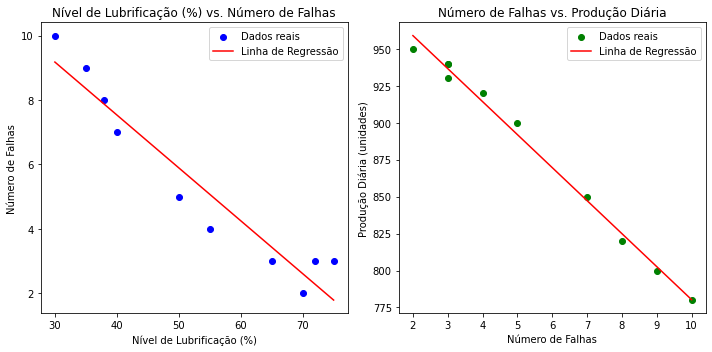

In [8]:
# Gráfico 1: Nível de Lubrificação (%) vs. Número de Falhas
plt.figure(figsize=(10, 5))

# Plotando os pontos reais
plt.subplot(1, 2, 1)
plt.scatter(df['Nível de Lubrificação (%)'], df['Número de Falhas'], color='blue', label='Dados reais')

# Linha de regressão
X_lub_line = np.linspace(df['Nível de Lubrificação (%)'].min(), df['Nível de Lubrificação (%)'].max(), 100)
y_lub_line = model_lub_falhas.predict(sm.add_constant(X_lub_line))
plt.plot(X_lub_line, y_lub_line, color='red', label='Linha de Regressão')

plt.title('Nível de Lubrificação (%) vs. Número de Falhas')
plt.xlabel('Nível de Lubrificação (%)')
plt.ylabel('Número de Falhas')
plt.legend()

# Gráfico 2: Número de Falhas vs. Produção Diária
plt.subplot(1, 2, 2)
plt.scatter(df['Número de Falhas'], df['Produção Diária (unidades)'], color='green', label='Dados reais')

# Linha de regressão
X_falhas_line = np.linspace(df['Número de Falhas'].min(), df['Número de Falhas'].max(), 100)
y_falhas_line = model_falhas_producao.predict(sm.add_constant(X_falhas_line))
plt.plot(X_falhas_line, y_falhas_line, color='red', label='Linha de Regressão')

plt.title('Número de Falhas vs. Produção Diária')
plt.xlabel('Número de Falhas')
plt.ylabel('Produção Diária (unidades)')
plt.legend()

plt.tight_layout()
plt.show()

Os gráficos apresentados oferecem uma visualização das relações causais entre as variáveis analisadas. 

### Gráfico 1: Nível de Lubrificação (%) vs. Número de Falhas

- **Dados reais (pontos azuis)**: Cada ponto no gráfico representa um dia de observação, indicando o nível de lubrificação dos componentes mecânicos (eixo X) e o número de falhas mecânicas que ocorreram (eixo Y) naquele dia.
- **Linha de Regressão (vermelha)**: A linha de regressão indica a tendência linear estimada com base no modelo de regressão linear simples. A inclinação negativa desta linha mostra uma **relação inversa** entre as duas variáveis. Ou seja, à medida que o nível de lubrificação aumenta, o número de falhas diminui.

#### Interpretação:
A inclinação da linha de regressão demonstra que, para cada aumento percentual no nível de lubrificação, há uma redução significativa no número de falhas. Esse comportamento é esperado em cenários industriais, onde uma manutenção adequada dos componentes (lubrificação) leva a uma maior eficiência operacional e menor desgaste, resultando em menos falhas.

### Gráfico 2: Número de Falhas vs. Produção Diária (unidades)

- **Dados reais (pontos verdes)**: Este gráfico mostra a relação entre o número de falhas (eixo X) e a produção diária em unidades (eixo Y). Cada ponto representa um dia de operação, relacionando o número de falhas ocorridas e o total de unidades produzidas naquele dia.
- **Linha de Regressão (vermelha)**: A linha de regressão novamente indica uma tendência linear negativa. Isso significa que, à medida que o número de falhas aumenta, a produção diária diminui.

#### Interpretação:
Neste gráfico, a **correlação negativa** entre as variáveis é clara: quanto mais falhas ocorrem no processo, menor é a produção diária. A linha de regressão revela que cada falha mecânica adicional resulta em uma redução considerável no número de unidades produzidas, o que reflete diretamente os impactos das falhas mecânicas na eficiência da produção. O impacto das falhas é um reflexo direto da necessidade de interrupções para manutenção e reparo, o que naturalmente reduz o tempo disponível para a produção.

Esses gráficos mostram como é possível não só prever os resultados de um processo (número de falhas ou produção), mas também identificar relações de **causa e efeito**. Neste caso:
- **Lubrificação** afeta diretamente a **quantidade de falhas**.
- **Falhas mecânicas** impactam diretamente a **produção diária**.

## Heatmap de Correlações

Para visualizar a relação entre as variáveis de maneira mais clara, utilizamos um *heatmap* de correlações.

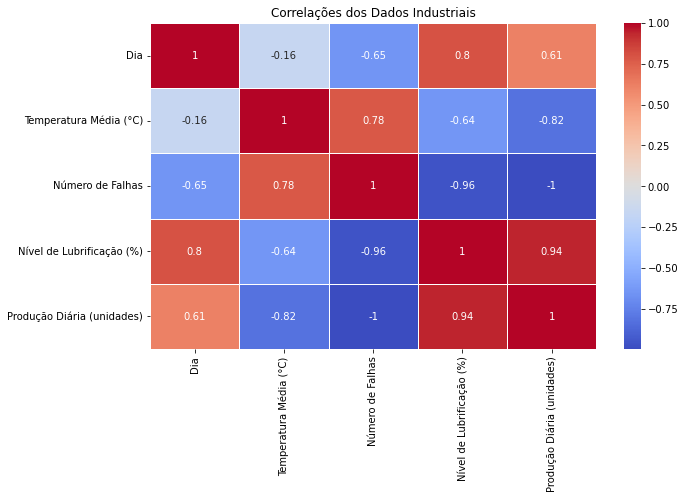

In [6]:
df = pd.DataFrame(data)

# Cálculo das correlações
correlations = df.corr()

# Exibindo a tabela de correlações com um heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlations, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlações dos Dados Industriais")
plt.show()

O *heatmap* apresentado visualiza as correlações entre as variáveis monitoradas no ambiente industrial. Cada célula representa o coeficiente de correlação de Pearson entre duas variáveis, com cores que variam de azul (correlação negativa) a vermelho (correlação positiva). Os valores numéricos dentro das células variam entre -1 e 1, onde:

- **1** significa uma correlação perfeita positiva.
- **-1** significa uma correlação perfeita negativa.
- **0** significa que não há correlação entre as variáveis.

### Principais Relações Identificadas:

1. **Temperatura Média (°C) vs. Número de Falhas**:
   - Correlação: **0.78**
   - Isso indica uma correlação positiva moderada a forte. À medida que a temperatura média aumenta, o número de falhas também tende a aumentar. Essa relação é importante em contextos industriais, pois temperaturas mais altas podem levar a condições de operação mais adversas, resultando em maior desgaste e falhas nos equipamentos.

2. **Nível de Lubrificação (%) vs. Número de Falhas**:
   - Correlação: **-0.96**
   - A correlação negativa muito forte indica que, à medida que o nível de lubrificação aumenta, o número de falhas diminui drasticamente. Isso demonstra claramente a importância da lubrificação adequada no controle das falhas mecânicas. Esta é uma relação de causa e efeito direta, já que a lubrificação reduz o atrito e o desgaste dos componentes, levando a menos falhas.

3. **Número de Falhas vs. Produção Diária (unidades)**:
   - Correlação: **-1**
   - A correlação negativa perfeita indica que um aumento no número de falhas resulta em uma redução exata na produção diária. Este é um exemplo claro de como as falhas impactam diretamente a produtividade: mais falhas significam menos tempo de operação e, consequentemente, uma produção diária menor.

4. **Nível de Lubrificação (%) vs. Produção Diária (unidades)**:
   - Correlação: **0.94**
   - A correlação positiva forte indica que, à medida que o nível de lubrificação aumenta, a produção diária também aumenta. Isso faz sentido, uma vez que a melhor lubrificação reduz falhas, o que permite que as máquinas funcionem por mais tempo e de forma mais eficiente, resultando em maior produção.

5. **Temperatura Média (°C) vs. Produção Diária (unidades)**:
   - Correlação: **-0.82**
   - Aqui observamos uma correlação negativa moderada a forte, indicando que temperaturas mais altas estão associadas a uma menor produção diária. Novamente, isso pode ser explicado pelo fato de que operações em condições de temperatura mais elevadas podem levar a mais falhas e paradas, diminuindo a produtividade.


## Conclusão

Compreender a diferença entre correlação e causalidade é essencial para cientistas de dados que buscam gerar valor real para o negócio. Saber por que algo acontece permite que intervenções sejam feitas de forma mais precisa, resultando em soluções mais eficazes e eficientes.


## Próximos Passos:

- **Educação Continuada**: Investir em aprender métodos de inferência causal e Causal ML.
- **Aplicação Prática**: Implementar essas técnicas em projetos atuais para identificar causas reais dos problemas.
- **Compartilhamento de Conhecimento**: Engajar-se com a comunidade para trocar experiências e insights sobre o tema.